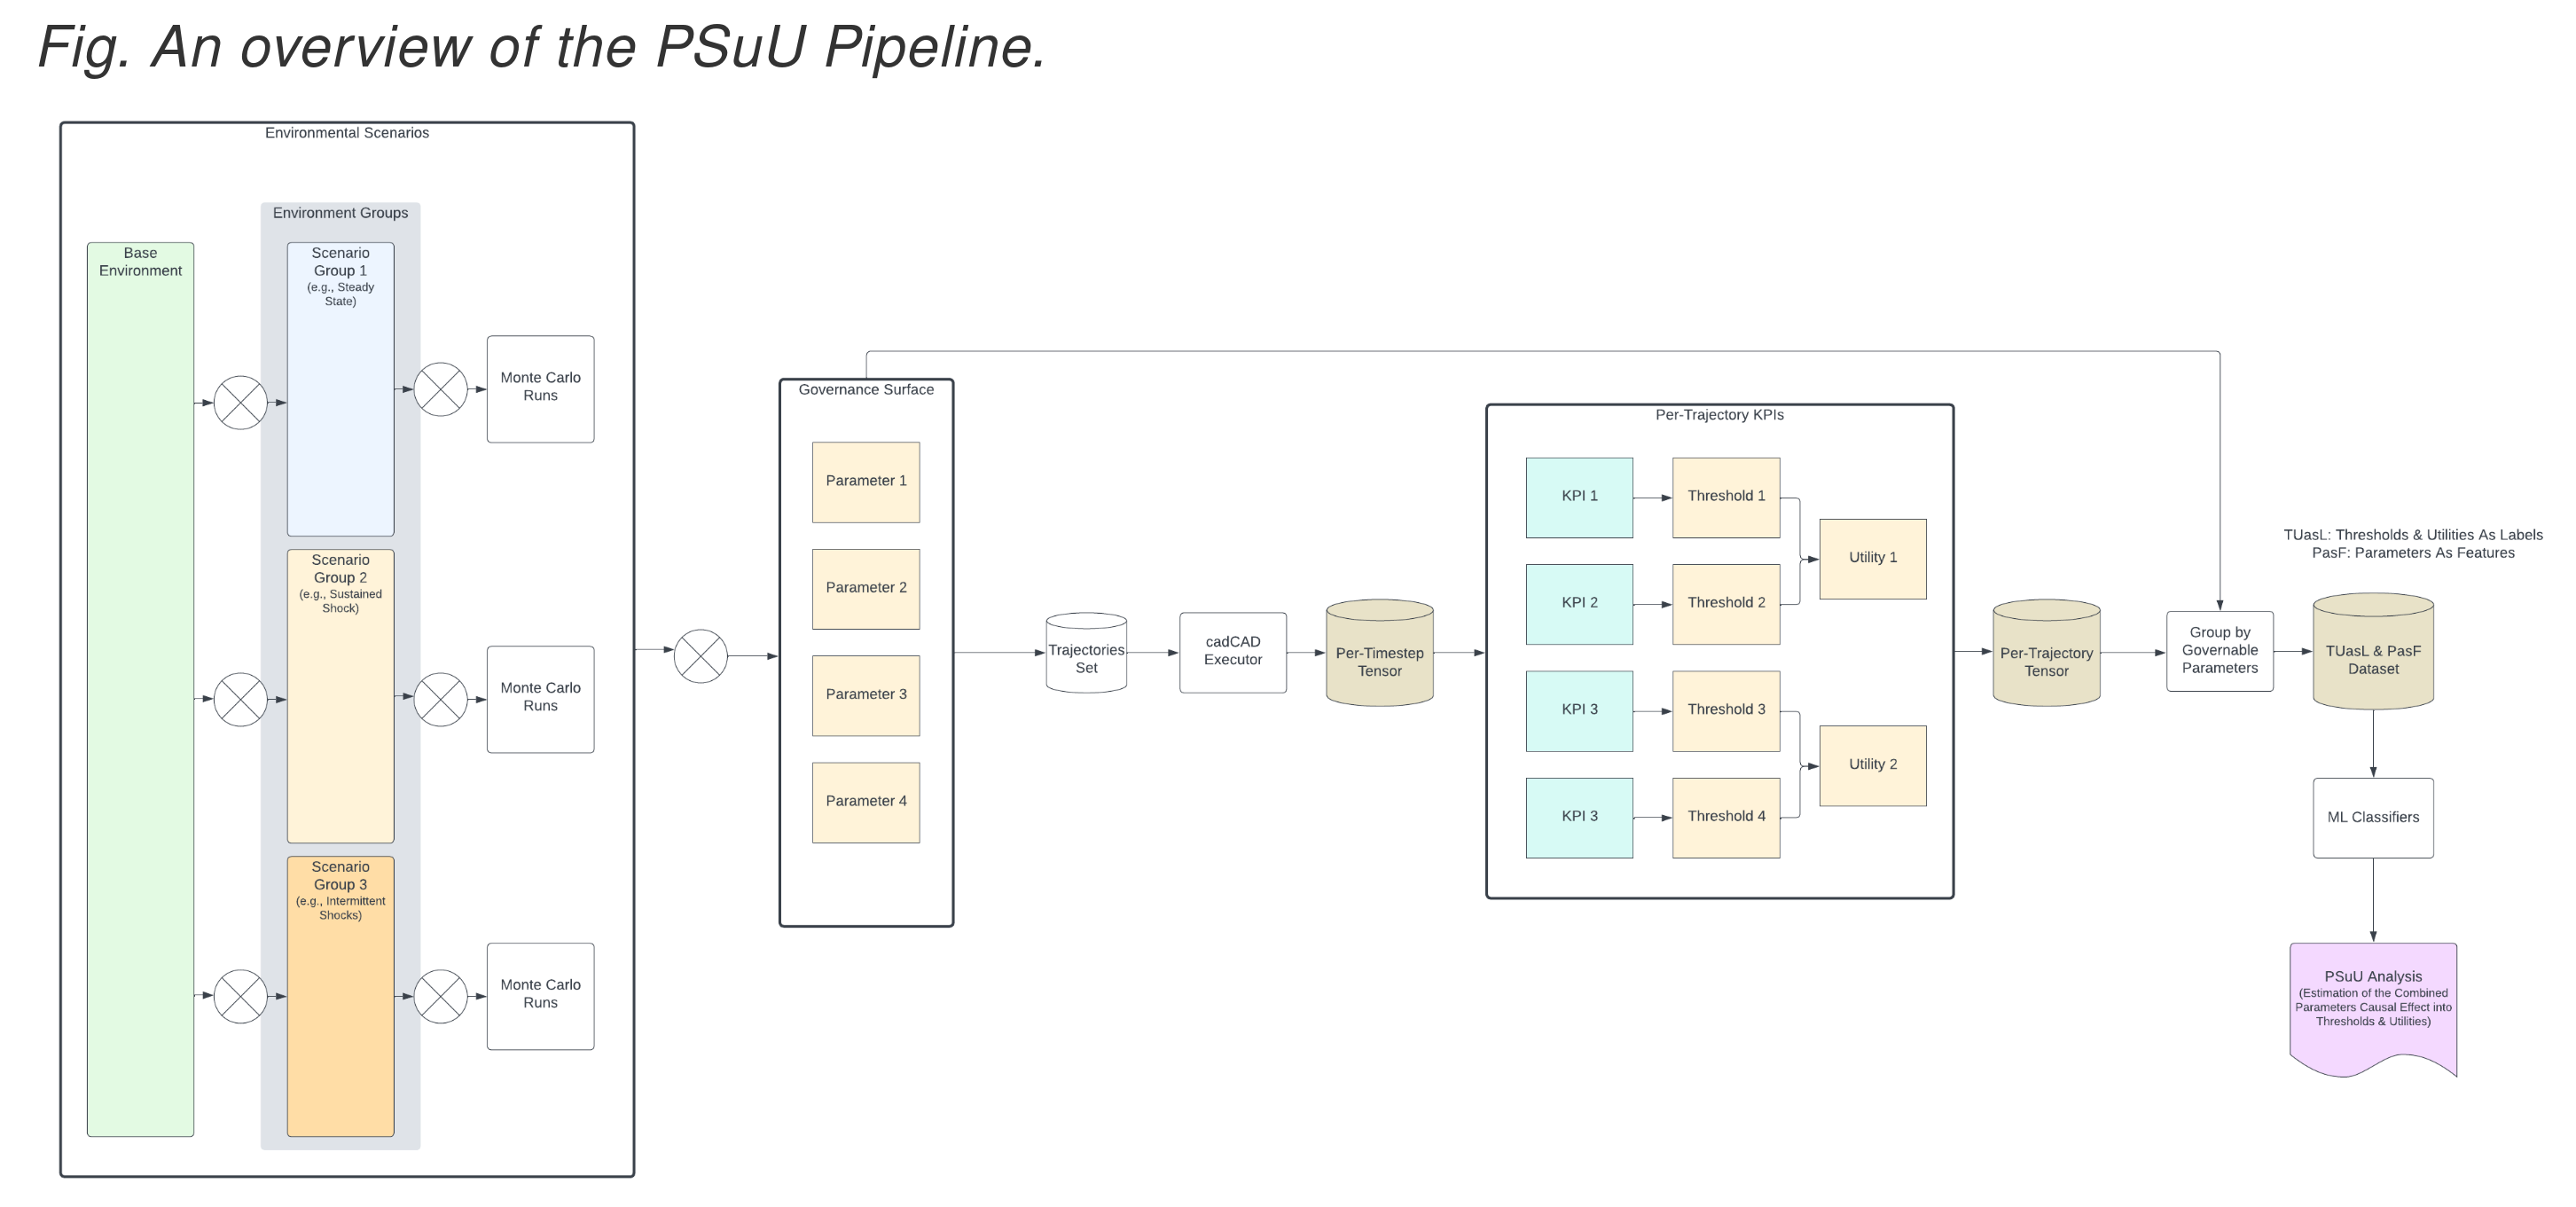

https://hackmd.io/iFeP7NemRH--KtWbPP_W0w?view

In [60]:
import pandas as pd
pd.set_option('display.max_columns', None)

import sys
sys.path.append('../')

In [53]:
latest = sorted(glob("../data/simulations/psuu-2024*"))[-1]
sim_df = pd.read_pickle(latest, compression='gzip')

Explode the reference subsidy parameter values.

In [54]:
# Function to parse a single row of subsidy components
def parse_subsidy_components(row):
    # Pattern to match each SubsidyComponent in the string
    pattern = r'SubsidyComponent\(initial_period_start=(.*?), initial_period_end=(.*?), max_cumulative_subsidy=(.*?), max_reference_subsidy=(.*?)\)'
    
    # Find all matches of the pattern
    matches = re.findall(pattern, row)
    
    # Initialize a dictionary to hold the parsed values
    parsed_values = {}
    
    # Loop through each match and extract values
    for i, match in enumerate(matches, start=1):
        keys = ['initial_period_start', 'initial_period_end', 'max_cumulative_subsidy', 'max_reference_subsidy']
        for j, key in enumerate(keys):
            parsed_values[f'component_{i}_{key}'] = match[j]
    
    return pd.Series(parsed_values)

# Apply the parsing function to each row and join the results with the original DataFrame
expanded_df = sim_df['reference_subsidy_components'].apply(parse_subsidy_components)

# Join the expanded columns back to the original DataFrame (if needed)
sim_df_expanded = sim_df.join(expanded_df)

In [55]:
sim_df_expanded

,days_passed,blocks_passed,circulating_supply,user_supply,earned_supply,issued_supply,earned_minus_burned_supply,total_supply,sum_of_stocks,storage_fee_per_rewards,block_utilization,avg_blockspace_usage,dsf_relative_disbursal_per_day,reward_issuance_balance,other_issuance_balance,operators_balance,nominators_balance,holders_balance,farmers_balance,staking_pool_balance,fund_balance,burnt_balance,nominator_pool_shares,operator_pool_shares,block_reward,blockchain_history_size,total_space_pledged,allocated_tokens,buffer_size,reference_subsidy,average_priority_fee,average_compute_weight_per_tx,average_transaction_size,transaction_count,average_compute_weight_per_bundle,average_bundle_size,bundle_count,compute_fee_multiplier,compute_fee_volume,free_space,extrinsic_length_in_bytes,storage_fee_in_credits_per_bytes,storage_fee_volume,priority_fee_volume,consensus_extrinsic_fee_volume,rewards_to_nominators,max_normal_weight,max_bundle_weight,target_block_fullness,adjustment_variable,storage_fees_to_farmers,storage_fees_to_fund,target_block_delta,targeted_adjustment_parameter,tx_compute_weight,simulation,subset,run,timestep,delta_days,delta_blocks,average_compute_weight_per_budle,label,environmental_label,timestep_in_days,reference_subsidy_components,block_time_in_seconds,reward_proposer_share,max_credit_supply,compute_weight_to_fee,component_1_initial_period_start,component_1_initial_period_end,component_1_max_cumulative_subsidy,component_1_max_reference_subsidy,component_2_initial_period_start,component_2_initial_period_end,component_2_max_cumulative_subsidy,component_2_max_reference_subsidy
0,0,0.0,0.000000,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,1.134600e+09,1.865400e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,NaN,0,0,0.0,0.000000e+00,0.0,0.0,0.0,256,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,0,0,1,0,NaN,NaN,NaN,standard,growing-utilization,1,"[SubsidyComponent(initial_period_start=0.0, in...",6,0.333333,3000000000,10000,0.0,0.0,7,900000000.0,219000.0,21024000.0,4,900000000.0
0,0,0.0,0.000000,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,1.134600e+09,1.865400e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,NaN,0,0,0.0,0.000000e+00,0.0,0.0,0.0,256,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,0,0,1,0,NaN,NaN,NaN,standard,growing-utilization,1,"[SubsidyComponent(initial_period_start=0.0, in...",6,0.333333,3000000000,10000,219000.0,219000.0,7,300000000.0,219000.0,21024000.0,7,900000000.0
0,0,0.0,0.000000,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,1.134600e+09,1.865400e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,NaN,0,0,0.0,0.000000e+00,0.0,0.0,0.0,256,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,0,0,1,0,NaN,NaN,NaN,standard,growing-utilization,1,"[SubsidyComponent(initial_period_start=0.0, in...",6,0.333333,3000000000,10000,0.0,0.0,1,300000000.0,438000.0,5256000.0,7,1500000000.0
0,0,0.0,0.000000,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,1.134600e+09,1.865400e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,NaN,0,0,0.0,0.000000e+00,0.0,0.0,0.0,256,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,0,0,1,0,NaN,NaN,NaN,standard,growing-utilization,1,"[SubsidyComponent(initial_period_start=0.0, in...",6,0.333333,3000000000,10000,0.0,0.0,1,1500000000.0,0.0,5256000.0,7,300000000.0
0,0,0.0,0.000000,0.00

In [64]:
from subspace_model.params import GOVERNANCE_SURFACE

In [73]:
governance_surface_params = (set(GOVERNANCE_SURFACE.keys()) | {c for c in sim_df_expanded.columns if 'component' in c}) - {'reference_subsidy_components'}
governance_surface_params

{'component_1_initial_period_end',
 'component_1_initial_period_start',
 'component_1_max_cumulative_subsidy',
 'component_1_max_reference_subsidy',
 'component_2_initial_period_end',
 'component_2_initial_period_start',
 'component_2_max_cumulative_subsidy',
 'component_2_max_reference_subsidy',
 'compute_weight_to_fee',
 'reward_proposer_share'}

In [75]:
trajectory_id_columns = ['simulation', 'subset', 'run']
agg_columns = ['simulation', 'subset', 'run'] + list(governance_surface_params)

In [ ]:
def trajectory_race_mode_fraction(trajectory_df) -> float:
    return trajectory_df.current_process.map(lambda x: (x.phase == SelectionPhase.proof_race) if type(x) == Process else False).mean()


def trajectory_skipped_fraction(trajectory_df) -> float:
    return trajectory_df.current_process.map(lambda x: (x.phase == SelectionPhase.skipped) if type(x) == Process else False).mean()

In [59]:
KPIs_per_trajectory = {
    'KPI1': lambda: 'pass',
    'KPI2': lambda: 'pass'
}

In [77]:
kpi_dfs = []
for kpi, kpi_f in KPIs_per_trajectory.items():
    kpi_s = sim_df_expanded.head(1000).groupby(agg_columns).apply(kpi_f, include_groups=False)
    kpi_s.name = kpi
    kpi_dfs.append(kpi_s)


all_kpi_df = pd.concat(kpi_dfs, axis=1)

TypeError: <lambda>() got an unexpected keyword argument 'include_groups'